In [2]:
import pandas as pd
import numpy as np

In [3]:
2+2

4

In [95]:
# Load Data
df = pd.read_csv('/Users/shilpitiwari/LHL DataScience Bootcamp/w5/d5/Random Flights.csv')
df.head()



,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-04-17,AA,AA_CODESHARE,AA,5561,OH,N537EA,5561,10599,BHM,...,772,0.0,0.0,71.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-07-16,DL,DL_CODESHARE,DL,5551,EV,N758EV,5551,10397,ATL,...,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-10,AA,AA,AA,513,AA,N961UW,513,13487,MSP,...,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-17,DL,DL,DL,2598,DL,N830DN,2598,10397,ATL,...,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-21,B6,B6,B6,16,B6,N945JB,16,14771,SFO,...,2586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [ ]:
# for modeling
# ['fl_date',
#        'origin', 'origin_city_name',
#         'dest', 'dest_city_name',  'crs_dep_time',
#        'crs_arr_time',  'cancelled',
#        'cancellation_code', 'diverted', 'dup',
#        'acrs_elapsed_time', 'air_time', 'flights', 'distance'
# ]



# check column of actual test data

In [4]:
df[['arr_time', 'dep_time', 'air_time', 'dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay']].head(20)

,arr_time,dep_time,air_time,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1534.0,1133.0,108.0,26.0,71.0,0.0,0.0,71.0,0.0,0.0
1,1625.0,1543.0,86.0,-7.0,-25.0,NaN,NaN,NaN,NaN,NaN
2,1430.0,1100.0,129.0,-3.0,-13.0,NaN,NaN,NaN,NaN,NaN
3,2114.0,1948.0,69.0,-5.0,-22.0,NaN,NaN,NaN,NaN,NaN
4,1522.0,639.0,287.0,-6.0,2.0,NaN,NaN,NaN,NaN,NaN
5,2344.0,2303.0,25.0,98.0,100.0,0.0,0.0,2.0,0.0,98.0
6,1027.0,850.0,204.0,0.0,-18.0,NaN,NaN,NaN,NaN,NaN
7,1040.0,951.0,93.0,16.0,5.0,NaN,NaN,NaN,NaN,NaN
8,2219.0,1928.0,97.0,-2.0,-6.0,NaN,NaN,NaN,NaN,NaN
9,2117.0,2006.0,44.0,-4.0,-9.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                  4
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                 19
dep_delay                19
taxi_out                 20
wheels_off               20
wheels_on                20
taxi_in                  20
crs_arr_time              0
arr_time                 20
arr_delay                21
cancelled                 0
cancellation_code       980
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time      21
air_time                 21
flights                   0
distance                  0
carrier_delay           798
weather_delay           798
nas_delay           

In [6]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [7]:
df['dep_time'].value_counts()

558.0     6
1137.0    5
909.0     5
2055.0    5
1236.0    4
         ..
2027.0    1
933.0     1
2234.0    1
658.0     1
1243.0    1
Name: dep_time, Length: 628, dtype: int64

In [8]:
df1 = df[df['arr_time'].notna()]

In [9]:
df = df1[df1['dep_time'].notna()]
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-04-17,AA,AA_CODESHARE,AA,5561,OH,N537EA,5561,10599,BHM,...,772,0.0,0.0,71.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-07-16,DL,DL_CODESHARE,DL,5551,EV,N758EV,5551,10397,ATL,...,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-10,AA,AA,AA,513,AA,N961UW,513,13487,MSP,...,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-17,DL,DL,DL,2598,DL,N830DN,2598,10397,ATL,...,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-21,B6,B6,B6,16,B6,N945JB,16,14771,SFO,...,2586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2019-03-21,NK,NK,NK,906,NK,N614NK,906,11292,DEN,...,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,2019-05-22,WN,WN,WN,628,WN,N245WN,628,14679,SAN,...,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2019-10-23,AS,AS_CODESHARE,AS,3397,OO,N400SY,3397,13198,MCI,...,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2018-05-01,AA,AA_CODESHARE,AA,3890,MQ,N523AE,3890,13930,ORD,...,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time                 0
dep_delay                0
taxi_out                 0
wheels_off               0
wheels_on                0
taxi_in                  0
crs_arr_time             0
arr_time                 0
arr_delay                1
cancelled                0
cancellation_code      980
diverted                 0
dup                      0
crs_elapsed_time         0
actual_elapsed_time      1
air_time                 1
flights                  0
distance                 0
carrier_delay          778
weather_delay          778
nas_delay              778
security_delay         778
l

In [11]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [12]:
# Selecting columns
col_new = ['fl_date',
        'op_unique_carrier',
       'op_carrier_fl_num', 'origin_city_name',
       'dest_city_name', 
       'dep_delay', 'taxi_out', 'taxi_in','arr_time', 'dep_time',
       'arr_delay', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay']

In [13]:
# creating new df with selected columns
new_df = df[col_new]
new_df.head()

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_city_name,dest_city_name,dep_delay,taxi_out,taxi_in,arr_time,dep_time,arr_delay,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-04-17,OH,5561,"Birmingham, AL","Philadelphia, PA",26.0,70.0,3.0,1534.0,1133.0,71.0,1,772,0.0,0.0,71.0,0.0,0.0
1,2018-07-16,EV,5551,"Atlanta, GA","Moline, IL",-7.0,12.0,4.0,1625.0,1543.0,-25.0,1,633,NaN,NaN,NaN,NaN,NaN
2,2019-07-10,AA,513,"Minneapolis, MN","Philadelphia, PA",-3.0,12.0,9.0,1430.0,1100.0,-13.0,1,980,NaN,NaN,NaN,NaN,NaN
3,2019-04-17,DL,2598,"Atlanta, GA","Pittsburgh, PA",-5.0,10.0,7.0,2114.0,1948.0,-22.0,1,526,NaN,NaN,NaN,NaN,NaN
4,2018-08-21,B6,16,"San Francisco, CA","New York, NY",-6.0,48.0,8.0,1522.0,639.0,2.0,1,2586,NaN,NaN,NaN,NaN,NaN


In [14]:
new_df[['origin_city', 'origin_state']] = new_df.origin_city_name.str.split(',', expand = True)
new_df[['dest_city', 'dest_state']] = new_df.dest_city_name.str.split(',', expand = True)
new_df.head()

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,fl_date,op_unique_carrier,op_carrier_fl_num,origin_city_name,dest_city_name,dep_delay,taxi_out,taxi_in,arr_time,dep_time,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,origin_state,dest_city,dest_state
0,2018-04-17,OH,5561,"Birmingham, AL","Philadelphia, PA",26.0,70.0,3.0,1534.0,1133.0,...,772,0.0,0.0,71.0,0.0,0.0,Birmingham,AL,Philadelphia,PA
1,2018-07-16,EV,5551,"Atlanta, GA","Moline, IL",-7.0,12.0,4.0,1625.0,1543.0,...,633,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Moline,IL
2,2019-07-10,AA,513,"Minneapolis, MN","Philadelphia, PA",-3.0,12.0,9.0,1430.0,1100.0,...,980,NaN,NaN,NaN,NaN,NaN,Minneapolis,MN,Philadelphia,PA
3,2019-04-17,DL,2598,"Atlanta, GA","Pittsburgh, PA",-5.0,10.0,7.0,2114.0,1948.0,...,526,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Pittsburgh,PA
4,2018-08-21,B6,16,"San Francisco, CA","New York, NY",-6.0,48.0,8.0,1522.0,639.0,...,2586,NaN,NaN,NaN,NaN,NaN,San Francisco,CA,New York,NY


In [15]:
new_df[['year', 'month_number', 'date']] = new_df.fl_date.str.split('-', expand = True)
new_df.head()

/Users/shilpitiwari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,fl_date,op_unique_carrier,op_carrier_fl_num,origin_city_name,dest_city_name,dep_delay,taxi_out,taxi_in,arr_time,dep_time,...,nas_delay,security_delay,late_aircraft_delay,origin_city,origin_state,dest_city,dest_state,year,month_number,date
0,2018-04-17,OH,5561,"Birmingham, AL","Philadelphia, PA",26.0,70.0,3.0,1534.0,1133.0,...,71.0,0.0,0.0,Birmingham,AL,Philadelphia,PA,2018,04,17
1,2018-07-16,EV,5551,"Atlanta, GA","Moline, IL",-7.0,12.0,4.0,1625.0,1543.0,...,NaN,NaN,NaN,Atlanta,GA,Moline,IL,2018,07,16
2,2019-07-10,AA,513,"Minneapolis, MN","Philadelphia, PA",-3.0,12.0,9.0,1430.0,1100.0,...,NaN,NaN,NaN,Minneapolis,MN,Philadelphia,PA,2019,07,10
3,2019-04-17,DL,2598,"Atlanta, GA","Pittsburgh, PA",-5.0,10.0,7.0,2114.0,1948.0,...,NaN,NaN,NaN,Atlanta,GA,Pittsburgh,PA,2019,04,17
4,2018-08-21,B6,16,"San Francisco, CA","New York, NY",-6.0,48.0,8.0,1522.0,639.0,...,NaN,NaN,NaN,San Francisco,CA,New York,NY,2018,08,21


In [113]:
new_df.replace({'month_number' : { '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', 
                                  '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', 
                                  '08': 'Aug', '09': 'Sep', '10': 'Oct' , '11': 'Nov', '12': 'Dec'}})

,fl_date,op_unique_carrier,op_carrier_fl_num,origin_city_name,dest_city_name,dep_delay,taxi_out,taxi_in,arr_delay,flights,...,late_aircraft_delay,city,state,origin_city,origin_state,dest_city,dest_state,year,month_number,date
0,2018-04-17,OH,5561,"Birmingham, AL","Philadelphia, PA",26.0,70.0,3.0,71.0,1,...,0.0,Birmingham,AL,Birmingham,AL,Philadelphia,PA,2018,Apr,17
1,2018-07-16,EV,5551,"Atlanta, GA","Moline, IL",-7.0,12.0,4.0,-25.0,1,...,NaN,Atlanta,GA,Atlanta,GA,Moline,IL,2018,Jul,16
2,2019-07-10,AA,513,"Minneapolis, MN","Philadelphia, PA",-3.0,12.0,9.0,-13.0,1,...,NaN,Minneapolis,MN,Minneapolis,MN,Philadelphia,PA,2019,Jul,10
3,2019-04-17,DL,2598,"Atlanta, GA","Pittsburgh, PA",-5.0,10.0,7.0,-22.0,1,...,NaN,Atlanta,GA,Atlanta,GA,Pittsburgh,PA,2019,Apr,17
4,2018-08-21,B6,16,"San Francisco, CA","New York, NY",-6.0,48.0,8.0,2.0,1,...,NaN,San Francisco,CA,San Francisco,CA,New York,NY,2018,Aug,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2019-03-21,NK,906,"Denver, CO","Houston, TX",1.0,10.0,14.0,-2.0,1,...,NaN,Denver,CO,Denver,CO,Houston,TX,2019,Mar,21
995,2019-05-22,WN,628,"San Diego, CA","Phoenix, AZ",19.0,11.0,3.0,1.0,1,...,NaN,San Diego,CA,San Diego,CA,Phoenix,AZ,2019,May,22
996,2019-10-23,OO,3397,"Kansas City, MO","San Diego, CA",-18.0,10.0,3.0,-36.0,1,...,NaN,Kansas City,MO,Kansas City,MO,San Diego,CA,2019,Oct,23
997,2018-05-01,MQ,3890,"Chicago, IL","Baltimore, MD",-6.0,12.0,7.0,-13.0,1,...,NaN,Chicago,IL,Chicago,IL,Baltimore,MD,2018,May,01


In [16]:
# Selecting columns again with desired info
new_df.columns

Index(['fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin_city_name',
       'dest_city_name', 'dep_delay', 'taxi_out', 'taxi_in', 'arr_time',
       'dep_time', 'arr_delay', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_city', 'origin_state', 'dest_city', 'dest_state', 'year',
       'month_number', 'date'],
      dtype='object')

In [17]:
col2 = ['op_unique_carrier', 'op_carrier_fl_num', 
      'dep_delay', 'taxi_out', 'taxi_in', 'arr_delay',
       'flights', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'origin_city',
       'origin_state', 'dest_city', 'dest_state', 'year', 'month_number',
       'date']

In [18]:
df_eda = new_df[col2]
df_eda.shape

(980, 20)

In [19]:
df_eda.head(20)

,op_unique_carrier,op_carrier_fl_num,dep_delay,taxi_out,taxi_in,arr_delay,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,origin_state,dest_city,dest_state,year,month_number,date
0,OH,5561,26.0,70.0,3.0,71.0,1,772,0.0,0.0,71.0,0.0,0.0,Birmingham,AL,Philadelphia,PA,2018,04,17
1,EV,5551,-7.0,12.0,4.0,-25.0,1,633,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Moline,IL,2018,07,16
2,AA,513,-3.0,12.0,9.0,-13.0,1,980,NaN,NaN,NaN,NaN,NaN,Minneapolis,MN,Philadelphia,PA,2019,07,10
3,DL,2598,-5.0,10.0,7.0,-22.0,1,526,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Pittsburgh,PA,2019,04,17
4,B6,16,-6.0,48.0,8.0,2.0,1,2586,NaN,NaN,NaN,NaN,NaN,San Francisco,CA,New York,NY,2018,08,21
5,QX,2009,98.0,13.0,3.0,100.0,1,116,0.0,0.0,2.0,0.0,98.0,Portland,OR,Bend/Redmond,OR,2018,11,16
6,DL,2985,0.0,11.0,2.0,-18.0,1,1532,NaN,NaN,NaN,NaN,NaN,Minneapolis,MN,San Diego,CA,2018,10,31
7,OO,4172,16.0,9.0,7.0,5.0,1,596,NaN,NaN,NaN,NaN,NaN,Cincinnati,OH,Minneapolis,MN,2018,06,07
8,WN,6469,-2.0,8.0,6.0,-6.0,1,719,NaN,NaN,NaN,NaN,NaN,St. Louis,MO,Washington,DC,2019,11,17
9,AS,1490,-4.0,17.0,10.0,-9.0,1,236,NaN,NaN,NaN,NaN,NaN,Los Angeles,CA,Las Vegas,NV,2018,12,27


----

## EDA
- Task 5: 
   - What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [23]:
#DF for EDA
df_eda.head()

,op_unique_carrier,op_carrier_fl_num,dep_delay,taxi_out,taxi_in,arr_delay,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_city,origin_state,dest_city,dest_state,year,month_number,date
0,OH,5561,26.0,70.0,3.0,71.0,1,772,0.0,0.0,71.0,0.0,0.0,Birmingham,AL,Philadelphia,PA,2018,04,17
1,EV,5551,-7.0,12.0,4.0,-25.0,1,633,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Moline,IL,2018,07,16
2,AA,513,-3.0,12.0,9.0,-13.0,1,980,NaN,NaN,NaN,NaN,NaN,Minneapolis,MN,Philadelphia,PA,2019,07,10
3,DL,2598,-5.0,10.0,7.0,-22.0,1,526,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Pittsburgh,PA,2019,04,17
4,B6,16,-6.0,48.0,8.0,2.0,1,2586,NaN,NaN,NaN,NaN,NaN,San Francisco,CA,New York,NY,2018,08,21


In [128]:
df_eda['flights'].nunique()

1

### are arrival delays caused by departure delays

In [205]:
# filter arr delays(dep_delay >0)
fil_df = df_eda[(df_eda['arr_delay'] > 0)]
fil_df.shape

# filter dep delay from the above filtered data
dep_arr_delay = fil_df[(fil_df['dep_delay']>0)]

[Text(0.5, 0, 'dep_delay'),
 Text(1.5, 0, 'carrier_delay'),
 Text(2.5, 0, 'weather_delay'),
 Text(3.5, 0, 'nas_delay'),
 Text(4.5, 0, 'security_delay'),
 Text(5.5, 0, 'late_aircraft_delay')]

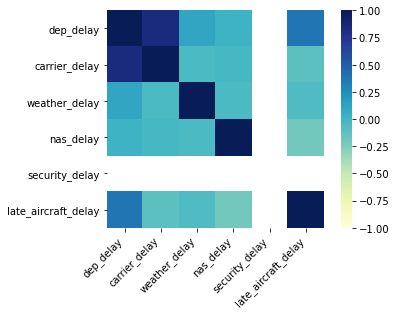

In [202]:
# check if dep delay and arrival delay have any correlation
df_dep = fil_df[['dep_delay', 'arr_delay']]

corr_col = fil_df[['dep_delay', 'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
ax = sns.heatmap(corr_col.corr(), vmin=-1, vmax=1, center=0,
    cmap='YlGnBu',
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

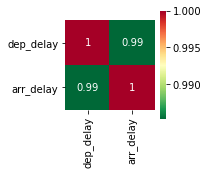

In [79]:
# Checking corr between arr and dep delay (Scatter plot can be tried!!)
# Adding corr coeff wrt every variable

corr_col = fil_df[['dep_delay', 'arr_delay']]
                   #'carrier_delay','weather_delay','nas_delay','late_aircraft_delay']]

plt.figure(figsize=(2,2))
g = sns.heatmap(corr_col.corr(),annot=True,cmap="RdYlGn_r", square = True)

In [207]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### What is the average percentage of delays that is already created before departure?

<img src='image (2).png' style='width:400px;height:200px'/>

- checking 1st and 2nd row

In [217]:
#  dep_delay occured due to arr_delay 
#filtering arr_delay >0 and count total as well as dep_delay

total_arr_delay = df_eda[df_eda['arr_delay']>0] 
print(total_arr_delay.shape[0]) #count total arrival delays

dep_if_arr_delay = total_arr_delay[total_arr_delay['dep_delay'] >0]
print(dep_if_arr_delay.shape[0])  #count dep delay if there is a arrival delay

351
235


In [220]:
# average percentage of delays that is already created before departure
avg_delay_already = (dep_if_arr_delay.shape[0])/(total_arr_delay.shape[0]+dep_if_arr_delay.shape[0])
avg_delay_already*100

40.1023890784983

### Are airlines able to lower the delay during the flights?

<img src='image (2).png' style='width:400px;height:200px'/>
 
- checking 1st and 3rd row

In [221]:
#  checking if airlines where able to arrive on time even after dep_delay

#filtering dep_delay >0 and count total as well as arr_delay<=0

total_dep_delay = df_eda[df_eda['dep_delay']>0] 
print(total_dep_delay.shape[0]) #count total departure delays

arrnot_if_dep_delay = total_dep_delay[total_dep_delay['arr_delay'] <=0]
print(arrnot_if_dep_delay.shape[0])  #count arr on/before time if there is a departure delay

327
91


In [223]:
# average percentage of arrival on/before time even after late departure
avg_arr_early = (arrnot_if_dep_delay.shape[0])/(total_dep_delay.shape[0]+arrnot_if_dep_delay.shape[0])
avg_arr_early*100

21.770334928229666


------

### **Task 6**: How many states cover 50% of US air traffic? 

In [134]:
df_eda.head(2)

,op_unique_carrier,op_carrier_fl_num,dep_delay,taxi_out,taxi_in,arr_delay,flights,distance,carrier_delay,weather_delay,...,late_aircraft_delay,origin_city,origin_state,dest_city,dest_state,year,month_number,date,tot_delay,avg_delay
0,OH,5561,26.0,70.0,3.0,71.0,1,772,0.0,0.0,...,0.0,Birmingham,AL,Philadelphia,PA,2018,04,17,97.0,26.804124
1,EV,5551,-7.0,12.0,4.0,-25.0,1,633,NaN,NaN,...,NaN,Atlanta,GA,Moline,IL,2018,07,16,-32.0,21.875000


In [135]:
df_eda.columns

Index(['op_unique_carrier', 'op_carrier_fl_num', 'dep_delay', 'taxi_out',
       'taxi_in', 'arr_delay', 'flights', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_city', 'origin_state', 'dest_city', 'dest_state', 'year',
       'month_number', 'date', 'tot_delay', 'avg_delay'],
      dtype='object')

In [138]:
states = df_eda[['flights', 'origin_state', 'dest_state']]
states

,flights,origin_state,dest_state
0,1,AL,PA
1,1,GA,IL
2,1,MN,PA
3,1,GA,PA
4,1,CA,NY
...,...,...,...
994,1,CO,TX
995,1,CA,AZ
996,1,MO,CA
997,1,IL,MD


In [230]:
# count of origin states
org_state_count = states.groupby(by = 'origin_state').count().sort_values(by = 'flights', ascending=False)
org_state_count.head()

,flights,dest_state
origin_state,,
CA,109,109
TX,99,99
IL,70,70
FL,64,64
GA,58,58


In [231]:
# delete unwanted column
del org_state_count['flights']
#rename column name
org_state_count.rename(columns={'dest_state':'origin_flights'}, inplace=True)
org_state_count.head()

,origin_flights
origin_state,
CA,109
TX,99
IL,70
FL,64
GA,58


In [233]:
# count of dest states
dest_state_count = states.groupby(by = 'dest_state').count().sort_values(by = 'flights', ascending=False)

#checking number of states
#print(dest_state_count.shape)

# delete unwanted column
del dest_state_count['flights']
#rename column name
dest_state_count.rename(columns={'origin_state':'dest_flights'}, inplace=True)
dest_state_count.head()

,dest_flights
dest_state,
CA,109
TX,88
FL,73
IL,66
NY,50


In [251]:
# join dataframes on common states index
state_df = dest_state_count.join(org_state_count)

#fill nan value with zero
state_df['dest_flights'] = state_df['dest_flights'].fillna(0)
state_df['origin_flights'] = state_df['origin_flights'].fillna(0)

# sum outbound and inbound
state_df['tot_flights'] = state_df['dest_flights']+state_df['origin_flights']

# sort in descending order
state_df.sort_values('tot_flights', ascending = False)

# cumulative sum of total flights
state_df['cum_tot'] = state_df.tot_flights.cumsum()

# stop at the state/row where cumulative sum is 50% of tot flights
# 50% of 1959.0
tot_50percent = 1959/2  # 979.5
state_df.head(7)

# reset index
state_df.reset_index(inplace=True)

# create Stacked bar with org & dest state = x and y = flights??

#### Cumsum Visualization
<img src='image (1).png' style='width:400px;height:200px'/>

In [249]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='dest_state'>

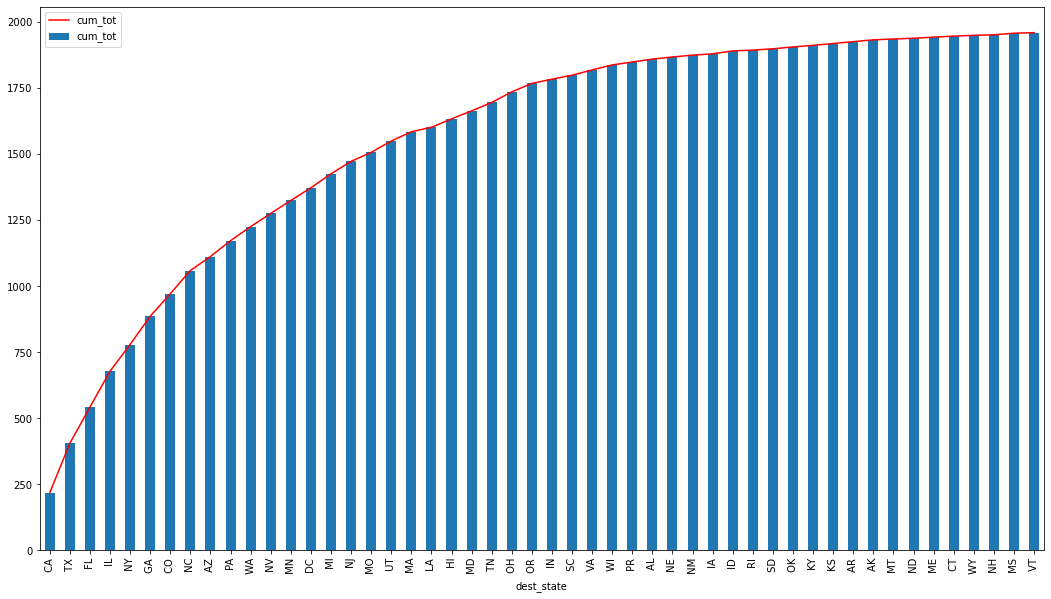

In [268]:
ax = state_df[['dest_state','cum_tot']].plot(x='dest_state',linestyle='-', color='Red', figsize=(18,10))
state_df[['dest_state','cum_tot']].plot(x='dest_state', kind='bar', ax=ax)
#plot y = 979.5!!

<AxesSubplot:xlabel='dest_state'>

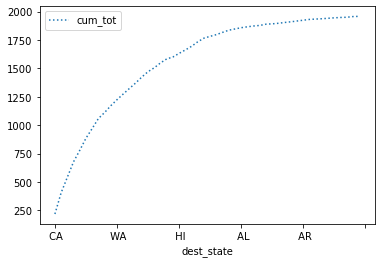

In [273]:
state_df[['dest_state','cum_tot']].plot(x='dest_state', linestyle='dotted')

-----

## Supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ideally atleast 30% of the data taken as sample data

In [22]:
df1 = pd.read_csv('Flight_Model_Sample.csv')
df1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-02-14,DL,DL,DL,765,DL,N825DN,765,14771,SFO,...,2139,0.0,0.0,16.0,0.0,41.0,NaN,NaN,NaN,NaN
1,2019-02-15,DL,DL,DL,2121,DL,N321US,2121,10721,BOS,...,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-21,WN,WN,WN,5071,WN,N948WN,5071,11259,DAL,...,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-06,DL,DL_CODESHARE,DL,4601,OO,N455CA,4601,14814,SHV,...,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-17,UA,UA,UA,1635,UA,N829UA,1635,11292,DEN,...,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df1.shape

(150000, 42)

In [24]:
df1.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,147611.000000,147573.000000,147463.000000,147463.000000,147388.000000,...,150000.000000,28608.000000,28608.000000,28608.000000,28608.000000,28608.000000,1080.000000,1080.000000,1080.000000,0.0
mean,2738.894387,2738.869660,12679.826173,12674.423993,1329.147667,1333.516777,10.565225,17.545533,1357.826302,1458.463884,...,766.141273,20.110179,3.986647,16.345882,0.074350,26.985738,1359.712963,40.498148,39.775000,NaN
std,1866.584527,1866.669183,1520.922419,1522.394257,489.653811,503.467052,47.833762,10.070327,504.993132,532.138832,...,585.223443,61.296512,34.897067,37.892313,2.295023,51.963599,488.202070,35.100016,33.540983,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-121.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,NaN
25%,1126.000000,1126.000000,11292.000000,11292.000000,915.000000,916.000000,-6.000000,11.000000,932.000000,1043.000000,...,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,932.000000,16.000000,16.000000,NaN
50%,2316.000000,2316.000000,12889.000000,12889.000000,1323.000000,1327.000000,-2.000000,15.000000,1341.000000,1459.000000,...,602.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1412.000000,30.000000,30.000000,NaN
75%,4346.000000,4345.000000,14057.000000,14057.000000,1735.000000,1743.000000,6.000000,20.000000,1758.000000,1908.000000,...,997.000000,17.000000,0.000000,20.000000,0.000000,33.000000,1749.000000,53.000000,51.000000,NaN
max,9390.000000,9390.000000,16869.000000,16869.000000,2359.000000,2400.000000,1572.000000,227.000000,2400.000000,2400.000000,...,5095.000000,1566.000000,1466.000000,1495.000000,227.000000,1094.000000,2357.000000,276.000000,195.000000,NaN


In [26]:
df1['cancelled'].value_counts()

0    147508
1      2492
Name: cancelled, dtype: int64

In [74]:
# for modeling

col_name = ['fl_date',
       'origin', 'origin_city_name', 'dest', 'dest_city_name','crs_dep_time',
       'crs_arr_time',  
       'diverted', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance']

# check column of actual test data
# Remove columns from Table flight test for evaluation prupose


In [75]:
df1 = df1[col_name]

In [76]:
df1.isnull().sum()

fl_date                   0
origin                    0
origin_city_name          0
dest                      0
dest_city_name            0
crs_dep_time              0
crs_arr_time              0
diverted                  0
cancelled                 0
crs_elapsed_time          0
actual_elapsed_time    2876
air_time               2942
flights                   0
distance                  0
dtype: int64

,diff,air_time,actual_elapsed_time
0,401.0,108.0,181.0
1,82.0,86.0,102.0
2,330.0,129.0,150.0
3,166.0,69.0,86.0
4,883.0,287.0,343.0
...,...,...,...
995,102.0,48.0,62.0
996,167.0,194.0,207.0
997,244.0,85.0,104.0
998,NaN,NaN,NaN


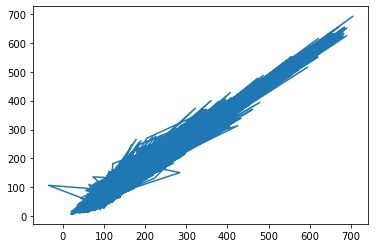

In [81]:
x = df1['crs_elapsed_time']
y = df1['air_time']
plt.plot(x, y, label = 'line')

df[['arr_time', 'dep_time', 'air_time', 'actual_elapsed_time']]
df['diff'] = df['arr_time'] - df['dep_time']
df[['diff', 'air_time', 'actual_elapsed_time']]

In [82]:
# decide to fill null values of air time with mean value
# try using median instead
df1.head(2)

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-02-14,SFO,"San Francisco, CA",ATL,"Atlanta, GA",1522,2251,0,0,269,238.0,217.0,1,2139
1,2019-02-15,BOS,"Boston, MA",MSP,"Minneapolis, MN",535,757,0,0,202,206.0,171.0,1,1124


In [83]:
df1['air_time'].mean()

107.66747813787757

In [84]:
df1['air_time'] = df1['air_time'].fillna(107.67)
import warnings
warnings.filterwarnings("ignore")

In [85]:
df1.air_time.isnull().sum()

0

In [86]:
df1.isnull().sum()

fl_date                   0
origin                    0
origin_city_name          0
dest                      0
dest_city_name            0
crs_dep_time              0
crs_arr_time              0
diverted                  0
cancelled                 0
crs_elapsed_time          0
actual_elapsed_time    2876
air_time                  0
flights                   0
distance                  0
dtype: int64

In [87]:
# fill null values of elapsed time with mean

df1['actual_elapsed_time'] = df1['actual_elapsed_time'].fillna(df1['actual_elapsed_time'].mean())

In [90]:
df1.isnull().sum()

fl_date                0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
crs_arr_time           0
diverted               0
cancelled              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [91]:
df1['actual_elapsed_time'].mean()

132.86156575405462

In [92]:
# Split city and state name
df1[['origin_city', 'origin_state']] = df1.origin_city_name.str.split(',', expand = True)
df1[['dest_city', 'dest_state']] = df1.dest_city_name.str.split(',', expand = True)
df1.head()

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state
0,2019-02-14,SFO,"San Francisco, CA",ATL,"Atlanta, GA",1522,2251,0,0,269,238.0,217.0,1,2139,San Francisco,CA,Atlanta,GA
1,2019-02-15,BOS,"Boston, MA",MSP,"Minneapolis, MN",535,757,0,0,202,206.0,171.0,1,1124,Boston,MA,Minneapolis,MN
2,2019-09-21,DAL,"Dallas, TX",MSP,"Minneapolis, MN",1455,1715,0,0,140,120.0,109.0,1,853,Dallas,TX,Minneapolis,MN
3,2018-06-06,SHV,"Shreveport, LA",ATL,"Atlanta, GA",725,1011,0,0,106,111.0,84.0,1,551,Shreveport,LA,Atlanta,GA
4,2019-07-17,DEN,"Denver, CO",ABQ,"Albuquerque, NM",1555,1717,0,0,82,67.0,52.0,1,349,Denver,CO,Albuquerque,NM


In [93]:
# Split date, month and year
df1[['year', 'month', 'date']] = df1.fl_date.str.split('-', expand = True)
df1.head(2)

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,...,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date
0,2019-02-14,SFO,"San Francisco, CA",ATL,"Atlanta, GA",1522,2251,0,0,269,...,217.0,1,2139,San Francisco,CA,Atlanta,GA,2019,02,14
1,2019-02-15,BOS,"Boston, MA",MSP,"Minneapolis, MN",535,757,0,0,202,...,171.0,1,1124,Boston,MA,Minneapolis,MN,2019,02,15


In [94]:
df1 = df1.replace({'month' : { '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', 
                                  '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', 
                                  '08': 'Aug', '09': 'Sep', '10': 'Oct' , '11': 'Nov', '12': 'Dec'}})
df1.head(2)

# can create week 

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,...,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date
0,2019-02-14,SFO,"San Francisco, CA",ATL,"Atlanta, GA",1522,2251,0,0,269,...,217.0,1,2139,San Francisco,CA,Atlanta,GA,2019,Feb,14
1,2019-02-15,BOS,"Boston, MA",MSP,"Minneapolis, MN",535,757,0,0,202,...,171.0,1,1124,Boston,MA,Minneapolis,MN,2019,Feb,15


In [95]:
# Create speed col using dist/ time
df1.columns

Index(['fl_date', 'origin', 'origin_city_name', 'dest', 'dest_city_name',
       'crs_dep_time', 'crs_arr_time', 'diverted', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_city', 'origin_state', 'dest_city', 'dest_state',
       'year', 'month', 'date'],
      dtype='object')

In [96]:
df1['speed'] = df1['distance'] / df1['actual_elapsed_time']
df1.head()

# Here, speed is miles per minute

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,...,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date,speed
0,2019-02-14,SFO,"San Francisco, CA",ATL,"Atlanta, GA",1522,2251,0,0,269,...,1,2139,San Francisco,CA,Atlanta,GA,2019,Feb,14,8.987395
1,2019-02-15,BOS,"Boston, MA",MSP,"Minneapolis, MN",535,757,0,0,202,...,1,1124,Boston,MA,Minneapolis,MN,2019,Feb,15,5.456311
2,2019-09-21,DAL,"Dallas, TX",MSP,"Minneapolis, MN",1455,1715,0,0,140,...,1,853,Dallas,TX,Minneapolis,MN,2019,Sep,21,7.108333
3,2018-06-06,SHV,"Shreveport, LA",ATL,"Atlanta, GA",725,1011,0,0,106,...,1,551,Shreveport,LA,Atlanta,GA,2018,Jun,06,4.963964
4,2019-07-17,DEN,"Denver, CO",ABQ,"Albuquerque, NM",1555,1717,0,0,82,...,1,349,Denver,CO,Albuquerque,NM,2019,Jul,17,5.208955


In [110]:
df1['dest_state'].unique()

array([' GA', ' MN', ' NM', ' NC', ' PA', ' FL', ' NJ', ' TX', ' OK',
       ' SC', ' TN', ' NE', ' HI', ' AZ', ' NH', ' DC', ' NV', ' WI',
       ' IL', ' ME', ' CO', ' CA', ' MI', ' NY', ' OR', ' KY', ' IA',
       ' OH', ' WY', ' MA', ' WA', ' MS', ' MD', ' ND', ' AK', ' IN',
       ' AL', ' UT', ' AR', ' CT', ' ID', ' MO', ' LA', ' VA', ' PR',
       ' MT', ' TT', ' KS', ' RI', ' WV', ' SD', ' VT', ' VI'],
      dtype=object)

In [111]:
df1[df1['dest_state'] == ' TT']

,fl_date,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,diverted,cancelled,crs_elapsed_time,...,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date,speed
627,2018-04-23,GUM,"Guam, TT",SPN,"Saipan, TT",2030,2120,0,0,50,...,1,129,Guam,TT,Saipan,TT,2018,Apr,23,2.866667
3780,2019-10-03,HNL,"Honolulu, HI",PPG,"Pago Pago, TT",1640,2120,0,0,340,...,1,2599,Honolulu,HI,Pago Pago,TT,2019,Oct,03,7.804805
9801,2018-01-02,ROP,"Rota, TT",SPN,"Saipan, TT",1315,1350,0,0,35,...,1,73,Rota,TT,Saipan,TT,2018,Jan,02,1.825000
11684,2019-09-02,HNL,"Honolulu, HI",PPG,"Pago Pago, TT",1630,2110,0,0,340,...,1,2599,Honolulu,HI,Pago Pago,TT,2019,Sep,02,7.758209
14314,2018-09-18,HNL,"Honolulu, HI",GUM,"Guam, TT",1410,1800,0,0,470,...,1,3801,Honolulu,HI,Guam,TT,2018,Sep,18,8.002105
15843,2018-04-12,SPN,"Saipan, TT",ROP,"Rota, TT",1330,1405,0,0,35,...,1,73,Saipan,TT,Rota,TT,2018,Apr,12,2.085714
21824,2018-07-11,SPN,"Saipan, TT",GUM,"Guam, TT",845,930,0,0,45,...,1,129,Saipan,TT,Guam,TT,2018,Jul,11,3.486486
21902,2018-05-23,ROP,"Rota, TT",SPN,"Saipan, TT",1315,1350,0,0,35,...,1,73,Rota,TT,Saipan,TT,2018,May,23,1.825000
22131,2019-10-14,GUM,"Guam, TT",SPN,"Saipan, TT",730,807,0,0,37,...,1,129,Guam,TT,Saipan,TT,2019,Oct,14,3.146341
22402,2018-07-15,HNL,"Honolulu, HI",GUM,"Guam, TT",1415,1800,0,0,465,...,1,3801,Honolulu,HI,Guam,TT,2018,Jul,15,7.935282


----

In [10]:
# can sample using: busy airport 
# add condition arr_del<0 as well as arr_del>0

import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df2 = pd.read_csv('StratifiedSample_150K.csv')
df2.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,AA,AA,AA,326,AA,N200NV,326,11057,CLT,...,599,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-01-01,AA,AA,AA,330,AA,N906NN,330,11057,CLT,...,130,0.0,0.0,19.0,0.0,46.0,NaN,NaN,NaN,NaN


In [203]:
# Do Automaed Data preprocess using below link 
# https://github.com/mdkearns/automated-data-preprocessing

y = df2['arr_delay']
y.head(3)

0    37
1    65
2     1
Name: arr_delay, dtype: int64

In [204]:
df2.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

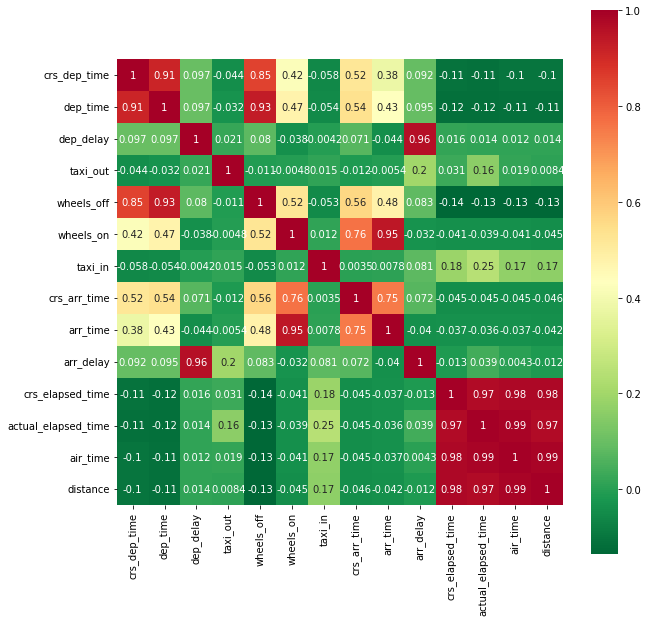

In [12]:
# checking corr coeff wrt every variable

corr_col = df2[[ 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay',
        'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance']]


plt.figure(figsize=(10,10))
g = sns.heatmap(corr_col.corr(),annot=True,cmap="RdYlGn_r", square = True)

In [ ]:
# Based on EDA, select potentially important features
# include Categorical variable

# Then build model-supervised learning
# can be created through clssification (arr_delay><0)


In [14]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,AA,AA,AA,326,AA,N200NV,326,11057,CLT,...,599,37.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-01-01,AA,AA,AA,330,AA,N906NN,330,11057,CLT,...,130,0.0,0.0,19.0,0.0,46.0,NaN,NaN,NaN,NaN
2,2018-01-01,AA,AA,AA,379,AA,N971NN,379,11057,CLT,...,650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,AA,AA,AA,418,AA,N981UY,418,11057,CLT,...,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,AA,AA,AA,435,AA,N188US,435,11057,CLT,...,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df2.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [44]:
col_columns = ['fl_date','mkt_unique_carrier',
       'origin', 'origin_city_name', 'dest', 'dest_city_name','crs_dep_time',
       'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',  
       'diverted', 'cancelled', 'arr_delay',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance']


### Modeling

- Linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

In [45]:
df2[['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier']]

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier
0,AA,AA,AA,326,AA
1,AA,AA,AA,330,AA
2,AA,AA,AA,379,AA
3,AA,AA,AA,418,AA
4,AA,AA,AA,435,AA
...,...,...,...,...,...
149995,UA,UA_CODESHARE,UA,6352,YV
149996,UA,UA_CODESHARE,UA,6357,YV
149997,UA,UA_CODESHARE,UA,6362,YV
149998,UA,UA_CODESHARE,UA,6371,YV


In [46]:
df2['mkt_unique_carrier'].value_counts()

AA    48884
UA    42332
DL    23890
WN    15022
AS    11776
NK     2726
F9     2320
B6     1459
VX     1181
HA      296
G4      114
Name: mkt_unique_carrier, dtype: int64

In [47]:
df2['cancelled'].value_counts()

0    150000
Name: cancelled, dtype: int64

In [205]:
df2 = df2[col_columns]
df2.head()

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,cancelled,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",745,906,17,855,933,10,0,0,37,141,125,98,1,599
1,2018-01-01,AA,CLT,"Charlotte, NC",RDU,"Raleigh/Durham, NC",2240,2333,14,2340,8,30,0,0,65,53,72,28,1,130
2,2018-01-01,AA,CLT,"Charlotte, NC",MIA,"Miami, FL",1633,1855,22,1653,1848,8,0,0,1,142,145,115,1,650
3,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",1755,1915,13,1837,1912,8,0,0,5,140,116,95,1,599
4,2018-01-01,AA,CLT,"Charlotte, NC",DFW,"Dallas/Fort Worth, TX",1919,2113,14,1953,2113,8,0,0,8,174,162,140,1,936


In [207]:
df2[['origin_city', 'origin_state']] = df2.origin_city_name.str.split(',', expand = True)
df2[['dest_city', 'dest_state']] = df2.dest_city_name.str.split(',', expand = True)
df2.head()

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,taxi_out,wheels_off,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state
0,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",745,906,17,855,...,37,141,125,98,1,599,Charlotte,NC,Chicago,IL
1,2018-01-01,AA,CLT,"Charlotte, NC",RDU,"Raleigh/Durham, NC",2240,2333,14,2340,...,65,53,72,28,1,130,Charlotte,NC,Raleigh/Durham,NC
2,2018-01-01,AA,CLT,"Charlotte, NC",MIA,"Miami, FL",1633,1855,22,1653,...,1,142,145,115,1,650,Charlotte,NC,Miami,FL
3,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",1755,1915,13,1837,...,5,140,116,95,1,599,Charlotte,NC,Chicago,IL
4,2018-01-01,AA,CLT,"Charlotte, NC",DFW,"Dallas/Fort Worth, TX",1919,2113,14,1953,...,8,174,162,140,1,936,Charlotte,NC,Dallas/Fort Worth,TX


In [208]:
# Split date, month and year
df2[['year', 'month', 'date']] = df2.fl_date.str.split('-', expand = True)
df2 = df2.replace({'month' : { '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', 
                                  '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', 
                                  '08': 'Aug', '09': 'Sep', '10': 'Oct' , '11': 'Nov', '12': 'Dec'}})
df2.head(2)

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,taxi_out,wheels_off,...,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,year,month,date
0,2018-01-01,AA,CLT,"Charlotte, NC",ORD,"Chicago, IL",745,906,17,855,...,98,1,599,Charlotte,NC,Chicago,IL,2018,Jan,01
1,2018-01-01,AA,CLT,"Charlotte, NC",RDU,"Raleigh/Durham, NC",2240,2333,14,2340,...,28,1,130,Charlotte,NC,Raleigh/Durham,NC,2018,Jan,01


In [209]:
# working on categorical features
df2.columns

Index(['fl_date', 'mkt_unique_carrier', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'diverted', 'cancelled',
       'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'origin_city', 'origin_state', 'dest_city',
       'dest_state', 'year', 'month', 'date'],
      dtype='object')

In [210]:
col_2 = ['mkt_unique_carrier', 'origin', 'dest',
       'crs_dep_time', 'crs_arr_time', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'diverted', 'arr_delay',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'origin_city', 'origin_state', 'dest_city', 'dest_state',
      'month', 'date']

In [211]:
df2 = df2[col_2]
df2.head(2)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,...,actual_elapsed_time,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,month,date
0,AA,CLT,ORD,745,906,17,855,933,10,0,...,125,98,1,599,Charlotte,NC,Chicago,IL,Jan,01
1,AA,CLT,RDU,2240,2333,14,2340,8,30,0,...,72,28,1,130,Charlotte,NC,Raleigh/Durham,NC,Jan,01


In [212]:
df2['origin'].unique()

array(['CLT', 'LAX', 'SFO', 'ORD', 'PHX', 'IAH', 'ATL', 'SEA', 'DEN',
       'DFW'], dtype=object)

In [57]:
# Encoding list
ecod_col = ['mkt_unique_carrier', 'origin', 'dest',
      'origin_city', 'origin_state', 'dest_city', 'dest_state',
      'month']

In [59]:
from sklearn import preprocessing


In [60]:
le = preprocessing.LabelEncoder()
#
# Encode single column status
#
df2['mkt_unique_carrier_new'] = le.fit_transform(df2.mkt_unique_carrier)

In [62]:
df2.head(2)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,...,air_time,flights,distance,origin_city,origin_state,dest_city,dest_state,month,date,mkt_unique_carrier_new
0,AA,CLT,ORD,745,906,17,855,933,10,0,...,98,1,599,Charlotte,NC,Chicago,IL,Feb,14,0
1,AA,CLT,RDU,2240,2333,14,2340,8,30,0,...,28,1,130,Charlotte,NC,Raleigh/Durham,NC,Feb,15,0


In [63]:
df2.mkt_unique_carrier_new.value_counts()

0     48884
8     42332
3     23890
10    15022
1     11776
7      2726
4      2320
2      1459
9      1181
6       296
5       114
Name: mkt_unique_carrier_new, dtype: int64

In [64]:
# encoding all the values of enc_col
df2['origin_new'] = le.fit_transform(df2.origin)

In [65]:
df2['dest_new'] = le.fit_transform(df2.dest)
df2['origin_new'] = le.fit_transform(df2.origin)
df2['origin_city_new'] = le.fit_transform(df2.origin_city)
df2['origin_state_new'] = le.fit_transform(df2.origin_state)
df2['dest_city_new'] = le.fit_transform(df2.dest_city)
df2['dest_state_new'] = le.fit_transform(df2.dest_state)
df2['month_new'] = le.fit_transform(df2.month)

In [66]:
df2.head()

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,...,month,date,mkt_unique_carrier_new,origin_new,dest_new,origin_city_new,origin_state_new,dest_city_new,dest_state_new,month_new
0,AA,CLT,ORD,745,906,17,855,933,10,0,...,Feb,14,0,1,212,1,5,49,13,3
1,AA,CLT,RDU,2240,2333,14,2340,8,30,0,...,Feb,15,0,1,239,1,5,218,26,3
2,AA,CLT,MIA,1633,1855,22,1653,1848,8,0,...,Sep,21,0,1,189,1,5,168,8,11
3,AA,CLT,ORD,1755,1915,13,1837,1912,8,0,...,Jun,06,0,1,212,1,5,49,13,6
4,AA,CLT,DFW,1919,2113,14,1953,2113,8,0,...,Jul,17,0,1,77,1,5,61,43,5


In [72]:
df2.columns

Index(['mkt_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'crs_arr_time',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'diverted',
       'arr_delay', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'origin_city', 'origin_state', 'dest_city',
       'dest_state', 'month', 'date', 'mkt_unique_carrier_new', 'origin_new',
       'dest_new', 'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new'],
      dtype='object')

In [76]:
df_model = df2[['crs_dep_time', 'crs_arr_time',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'diverted',
            'crs_elapsed_time', 'air_time',
       'flights', 'distance','date', 'mkt_unique_carrier_new', 'origin_new',
       'dest_new', 'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new', 'arr_delay']]
df_model.head(2)

,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,crs_elapsed_time,air_time,flights,...,date,mkt_unique_carrier_new,origin_new,dest_new,origin_city_new,origin_state_new,dest_city_new,dest_state_new,month_new,arr_delay
0,745,906,17,855,933,10,0,141,98,1,...,14,0,1,212,1,5,49,13,3,37
1,2240,2333,14,2340,8,30,0,53,28,1,...,15,0,1,239,1,5,218,26,3,65


In [77]:
# Regression Application

#split dataset in features and target variable
feature_cols = ['crs_dep_time', 'crs_arr_time',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'diverted',
            'crs_elapsed_time', 'air_time',
       'flights', 'distance','date', 'mkt_unique_carrier_new', 'origin_new',
       'dest_new', 'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new'] 
X = df_model[feature_cols] # Features
y = df_model.arr_delay # Target variable

In [79]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [81]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


/Users/shilpitiwari/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

NameError: name 'ax' is not defined

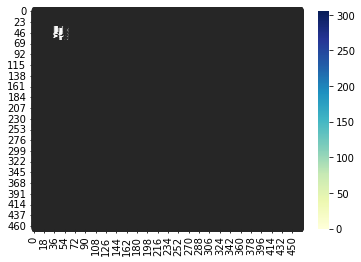

In [85]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.02664


In [124]:
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))

Precision: 0.0008384560598091187


/Users/shilpitiwari/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Recall: 0.02664


----

##### Changing target into classes

In [93]:
# Create new variable for arr_delay
df_model.arr_delay.describe()

count    150000.000000
mean         12.004387
std          52.065243
min        -200.000000
25%         -12.000000
50%           0.000000
75%          17.000000
max        1512.000000
Name: arr_delay, dtype: float64

In [94]:
df_model.columns

Index(['crs_dep_time', 'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'diverted', 'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'date', 'mkt_unique_carrier_new', 'origin_new', 'dest_new',
       'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new', 'arr_delay'],
      dtype='object')

<AxesSubplot:xlabel='wheels_off', ylabel='arr_delay'>

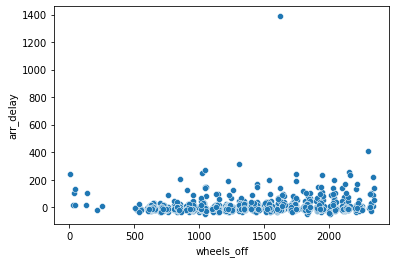

In [102]:
sns.scatterplot(x=df['wheels_off'] , y=df['arr_delay'], data = df)

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

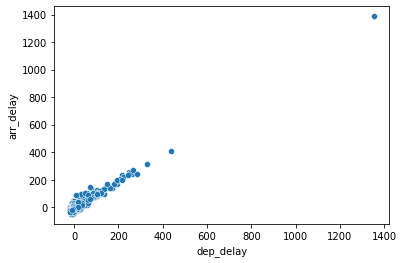

In [104]:
sns.scatterplot(x=df['dep_delay'] , y=df['arr_delay'], data = df)

In [150]:
df_model['arr_delay'].value_counts()

 1      3688
-10     3608
-12     3590
-8      3590
-9      3556
        ... 
 869       1
 297       1
 909       1
 448       1
 421       1
Name: arr_delay, Length: 720, dtype: int64

In [145]:
# x = df_model[df_model['arr_delay'] != 0]

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

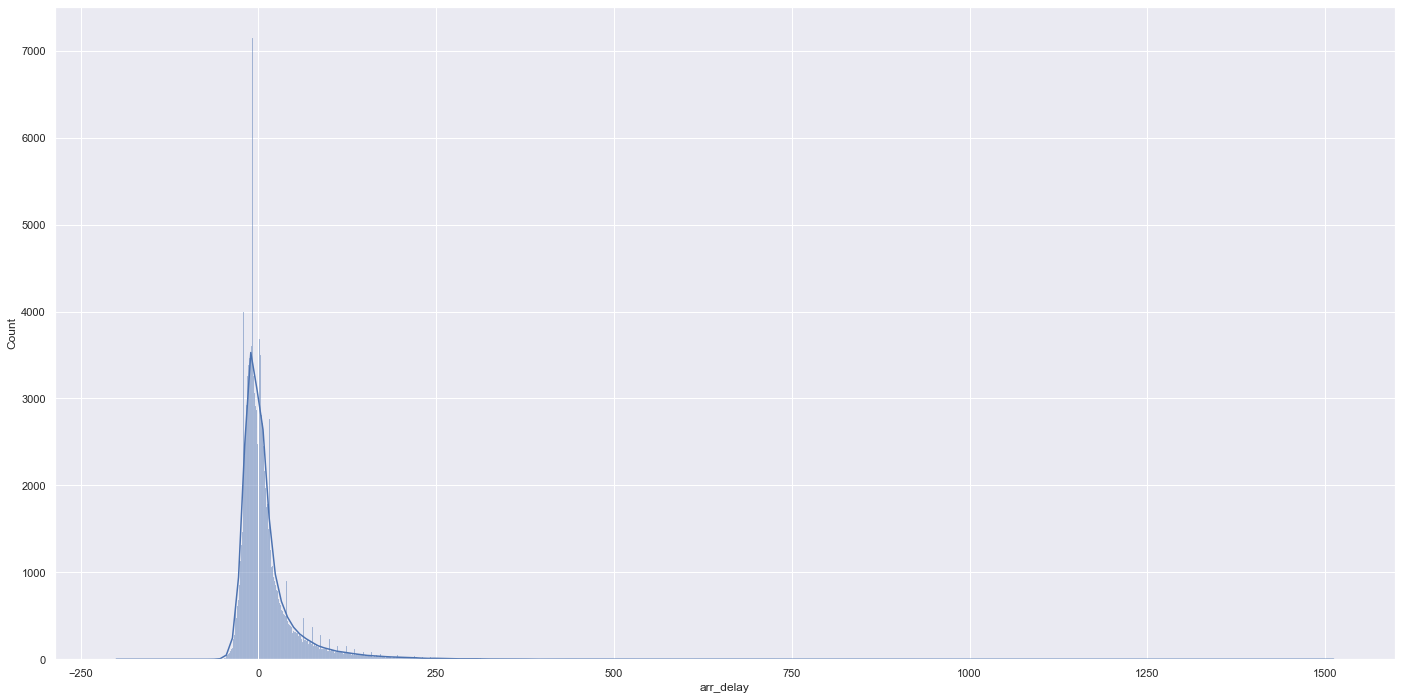

In [147]:
sns.histplot(data=df_model, x = x.arr_delay, kde=True)

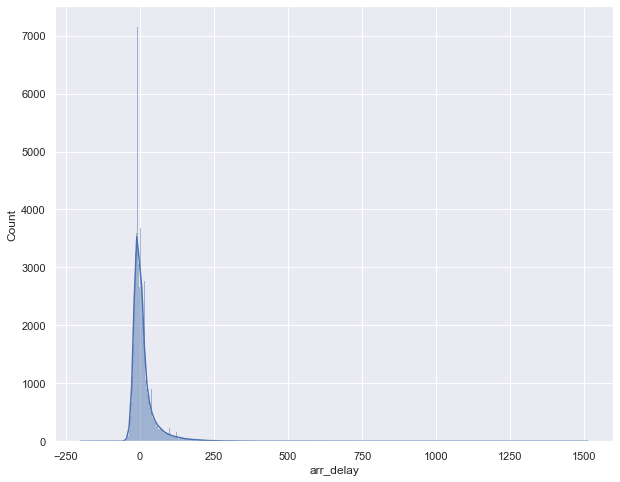

In [152]:
sns.histplot(data=df_model, x = df_model['arr_delay'], kde=True)
sns.set(rc={'figure.figsize':(10,8)})

In [159]:
 df_model.columns

Index(['crs_dep_time', 'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'diverted', 'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'date', 'mkt_unique_carrier_new', 'origin_new', 'dest_new',
       'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new', 'arr_delay'],
      dtype='object')

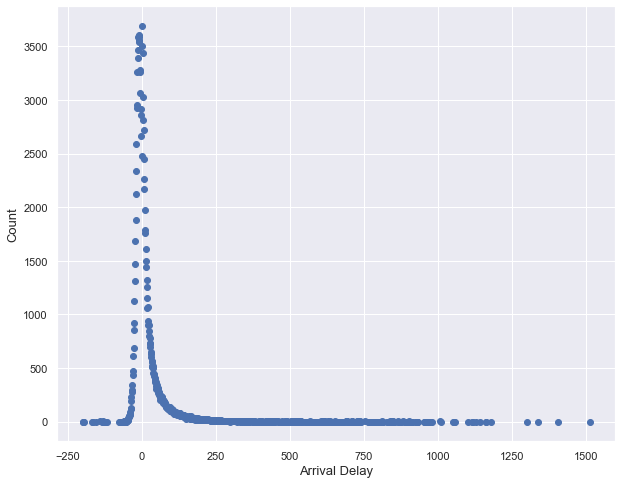

In [175]:
fig, ax = plt.subplots()
ax.scatter(a['index'], a['arr_delay'])
plt.ylabel('Count', fontsize=13)
plt.xlabel('Arrival Delay', fontsize=13)
plt.show()

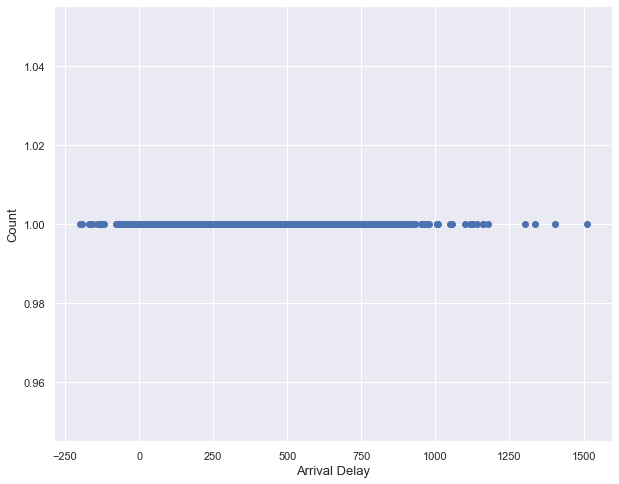

In [176]:
fig, ax = plt.subplots()
ax.scatter(df_model['arr_delay'], df_model['flights'])
plt.ylabel('Count', fontsize=13)
plt.xlabel('Arrival Delay', fontsize=13)
plt.show()

In [174]:
a = pd.DataFrame(df_model['arr_delay'].value_counts(), columns= ['arr_delay', 'count'])
a.reset_index(inplace= True)
a

,index,arr_delay,count
0,1,3688,NaN
1,-10,3608,NaN
2,-12,3590,NaN
3,-8,3590,NaN
4,-9,3556,NaN
...,...,...,...
715,869,1,NaN
716,297,1,NaN
717,909,1,NaN
718,448,1,NaN


<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

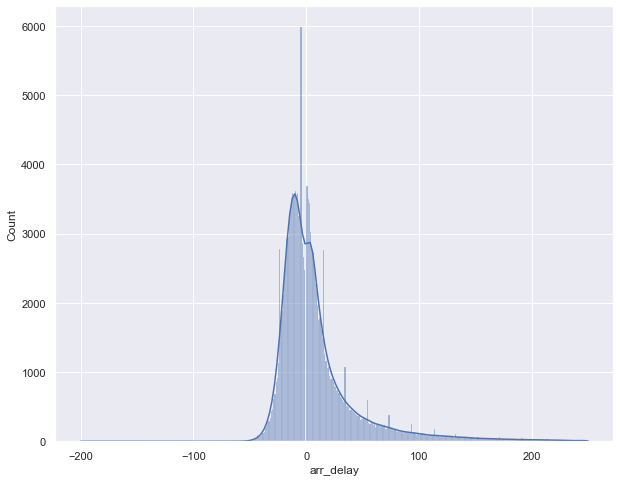

In [177]:
# Outlier detection and removal
# removing values above arr_delay >250 (900 rows out of 150K)
# delete outliers
df_model1 = df_model.drop(df_model[(df_model['arr_delay']>250)].index)

# reset index
df_model1 = df_model1.reset_index(drop=True)

# plot new df
sns.histplot(data=df_model1, x = df_model1['arr_delay'], kde=True)

<AxesSubplot:xlabel='arr_delay', ylabel='distance'>

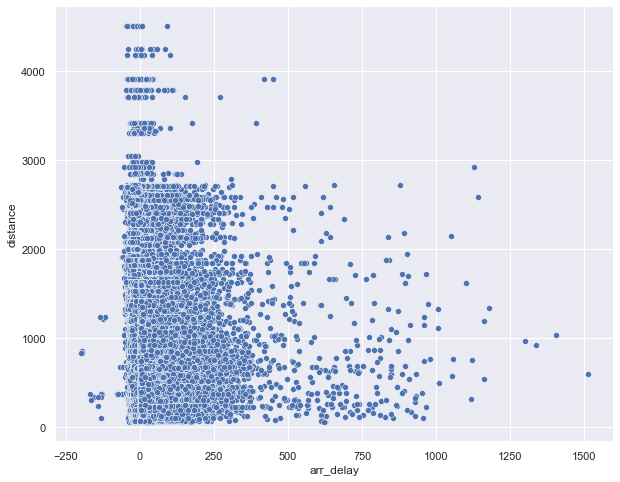

In [193]:
sns.scatterplot(data=df_model, x = df_model['arr_delay'], y=df_model['distance'])

<AxesSubplot:xlabel='arr_delay', ylabel='distance'>

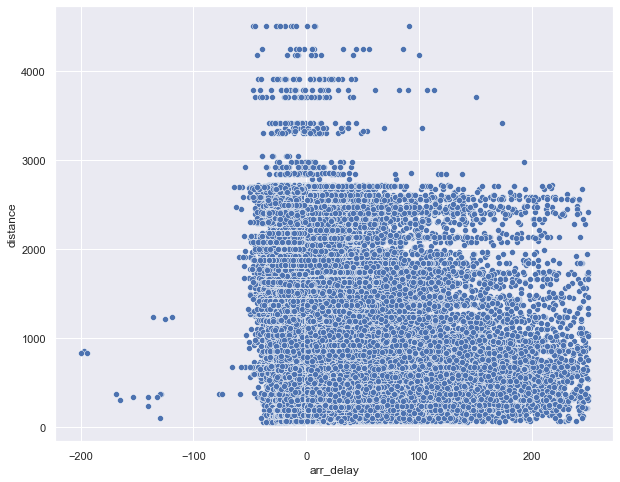

In [191]:
sns.scatterplot(data=df_model1, x = df_model1['arr_delay'], y=df_model1['distance'])

/Users/shilpitiwari/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

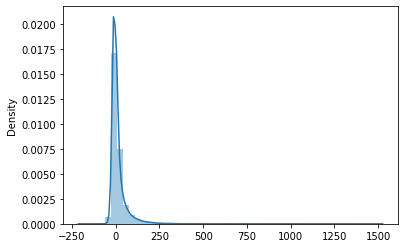

In [110]:
sns.distplot(x = df_model['arr_delay'], kde=True)

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

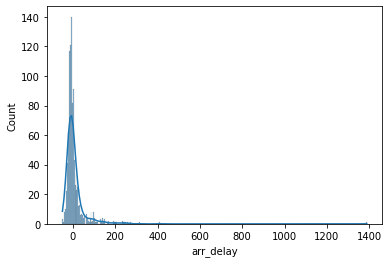

In [111]:
sns.histplot(data=df, x = df['arr_delay'], kde=True)

In [112]:
df.shape

(1000, 42)

In [115]:
df.arr_delay.describe()

count     979.000000
mean        7.525026
std        62.178302
min       -49.000000
25%       -14.000000
50%        -6.000000
75%         8.000000
max      1388.000000
Name: arr_delay, dtype: float64

In [126]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = df_model['arr_delay']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.548, p=0.000
Sample does not look Gaussian (reject H0)


/Users/shilpitiwari/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [127]:
from numpy import mean
from numpy import std
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=12.004 stdv=52.065


In [128]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = df['arr_delay']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))


Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)
mean=7.525 stdv=62.147


In [138]:
df['arr_delay'].value_counts().sort_values()

 166.0     1
 270.0     1
 50.0      1
 196.0     1
 98.0      1
          ..
-12.0     28
-3.0      30
-9.0      32
-8.0      36
-13.0     39
Name: arr_delay, Length: 156, dtype: int64

In [142]:
df['arr_delay'].sort_values()

894   -49.0
710   -49.0
479   -47.0
927   -43.0
586   -38.0
       ... 
728     NaN
838     NaN
917     NaN
939     NaN
998     NaN
Name: arr_delay, Length: 1000, dtype: float64

In [178]:
df_model1.columns

Index(['crs_dep_time', 'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'diverted', 'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'date', 'mkt_unique_carrier_new', 'origin_new', 'dest_new',
       'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new', 'arr_delay'],
      dtype='object')

/Users/shilpitiwari/opt/anaconda3/envs/test_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay_log', ylabel='Density'>

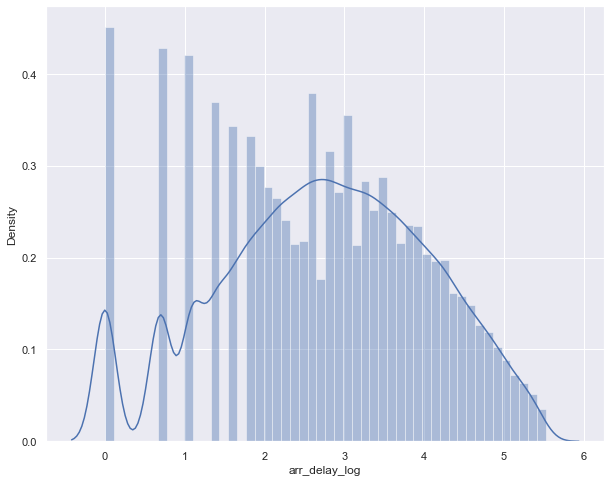

In [180]:
# log transformation
df_model1["arr_delay_log"] = df_model1["arr_delay"].apply(np.log)
sns.distplot(df_model1["arr_delay_log"])

In [181]:
# creating classes(Binning)
df_model1.columns

Index(['crs_dep_time', 'crs_arr_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'diverted', 'crs_elapsed_time', 'air_time', 'flights',
       'distance', 'date', 'mkt_unique_carrier_new', 'origin_new', 'dest_new',
       'origin_city_new', 'origin_state_new', 'dest_city_new',
       'dest_state_new', 'month_new', 'arr_delay', 'arr_delay_log'],
      dtype='object')

In [182]:
df_model1.head()

,crs_dep_time,crs_arr_time,taxi_out,wheels_off,wheels_on,taxi_in,diverted,crs_elapsed_time,air_time,flights,...,mkt_unique_carrier_new,origin_new,dest_new,origin_city_new,origin_state_new,dest_city_new,dest_state_new,month_new,arr_delay,arr_delay_log
0,745,906,17,855,933,10,0,141,98,1,...,0,1,212,1,5,49,13,3,37,3.610918
1,2240,2333,14,2340,8,30,0,53,28,1,...,0,1,239,1,5,218,26,3,65,4.174387
2,1633,1855,22,1653,1848,8,0,142,115,1,...,0,1,189,1,5,168,8,11,1,0.000000
3,1755,1915,13,1837,1912,8,0,140,95,1,...,0,1,212,1,5,49,13,6,5,1.609438
4,1919,2113,14,1953,2113,8,0,174,140,1,...,0,1,77,1,5,61,43,5,8,2.079442


In [194]:
# Binning times
df_model1['crs_dep_hrs'] = (df_model1['crs_dep_time']/100).astype(int)
df_model1['crs_dep_hrs']

0          7
1         22
2         16
3         17
4         19
          ..
149081    21
149082    18
149083    20
149084    17
149085    23
Name: crs_dep_hrs, Length: 149086, dtype: int64

<AxesSubplot:xlabel='crs_dep_hrs', ylabel='arr_delay'>

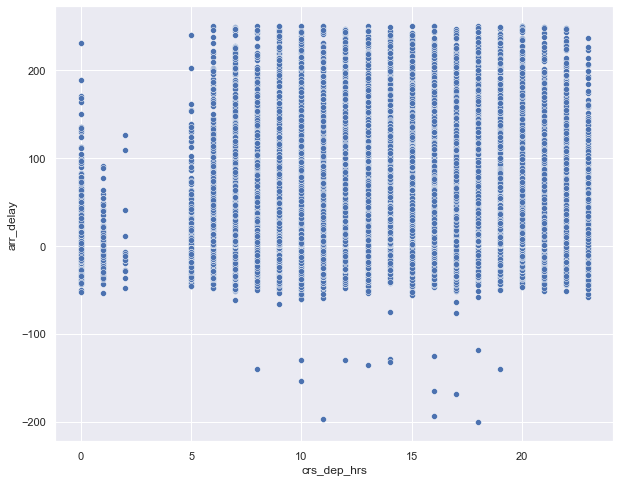

In [195]:
sns.scatterplot(x=df_model1['crs_dep_hrs'], y=df_model1['arr_delay'], data=df_model1)

<AxesSubplot:xlabel='arr_delay', ylabel='crs_arr_time'>

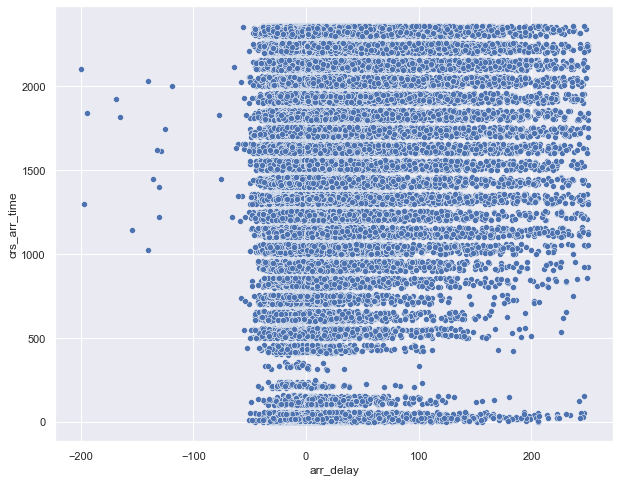

In [200]:
sns.scatterplot(y=df_model1['crs_arr_time'], x=df_model1['arr_delay'], data=df_model1)

<AxesSubplot:xlabel='arr_delay', ylabel='crs_elapsed_time'>

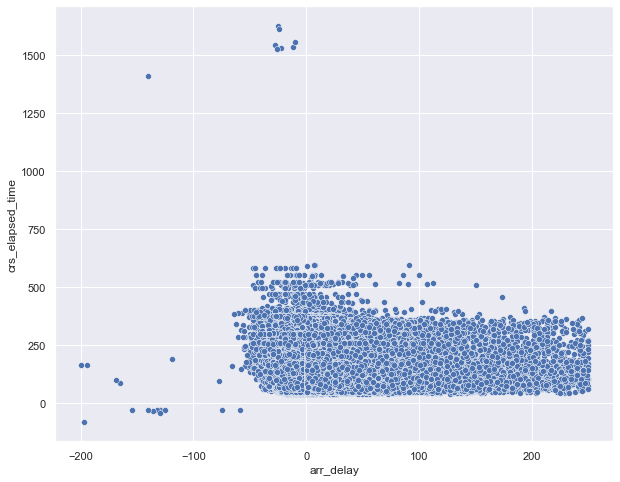

In [213]:
sns.scatterplot(y=df_model1['crs_elapsed_time'], x=df_model1['arr_delay'], data=df_model1)

<AxesSubplot:xlabel='arr_delay', ylabel='air_time'>

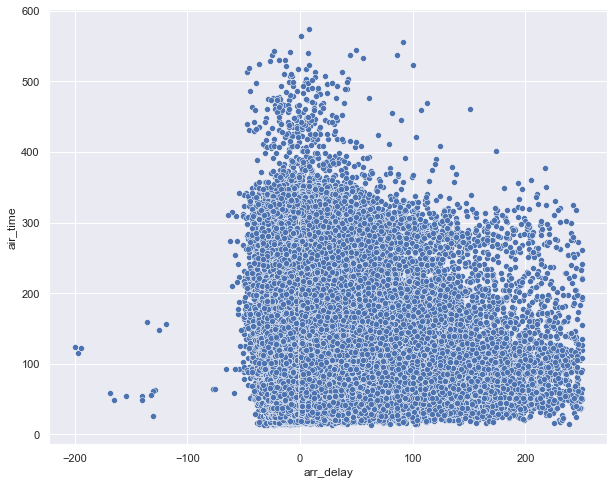

In [214]:
sns.scatterplot(y=df_model1['air_time'], x=df_model1['arr_delay'], data=df_model1)

In [ ]:
# Dont Remove outliers from target variables!!!


In [2]:
import pandas as pd

In [4]:
# Getting Data
random_df = pd.read_csv('Flight_Model_Sample.csv')
random_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-02-14,DL,DL,DL,765,DL,N825DN,765,14771,SFO,...,2139,0.0,0.0,16.0,0.0,41.0,NaN,NaN,NaN,NaN
1,2019-02-15,DL,DL,DL,2121,DL,N321US,2121,10721,BOS,...,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-21,WN,WN,WN,5071,WN,N948WN,5071,11259,DAL,...,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-06,DL,DL_CODESHARE,DL,4601,OO,N455CA,4601,14814,SHV,...,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-07-17,UA,UA,UA,1635,UA,N829UA,1635,11292,DEN,...,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
random_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=random_df[['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',]]  # Features
y=random_df['arr_delay']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


ValueError: could not convert string to float: '2018-07-14'

In [ ]:
# XGBoost
# Random Forest

#weather API